## Project 1 - Part 2

## <em> Optimization, Markov chain Monte Carlo, Bayesfast </em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>

***

### Imports

In [153]:
import numpy as np
from scipy.integrate import quad
import math
#For plotting
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='ticks')

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
localpath='/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_Project1_p2/'
colabpath='/content/drive/My Drive/P188_288/P188_288_Project1_p2/'

***

#### Problem 1 - Supernova Cosmology Project

In this project, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [3]:
data = np.loadtxt(localpath+"sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

<span style="color:blue"><i> 1. Plot the measured distance modulus as a function of redshift with errorbars. Then, assume three different scenarios: $\Omega_m = 0, 0.3, 1.$  </i></span> <br><br>
Remember:
$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}$$ <br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}(D_L)$$ <br><br>
<span style="color:blue"><i> Now, plot three curves of $\mu$ as a function of $z$ for $\Omega_m = 0, 0.3, 1$ on top of the measured data (Calculate $D_L$ using quad. For now, assume $h = 0.7$.) How do they fit? </i></span> <br>


In [97]:
def mu(z, omega_m, h=0.7):
    return 25 + 5*np.log10(D_l(z, omega_m))
    
def D_l(z_list, omega_m, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + (1-omega_m)*(1+x)**2)
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def chi_sq(mu_data, mu_model, mu_err):
    return np.sum(((mu_data - mu_model)/mu_err)**2)

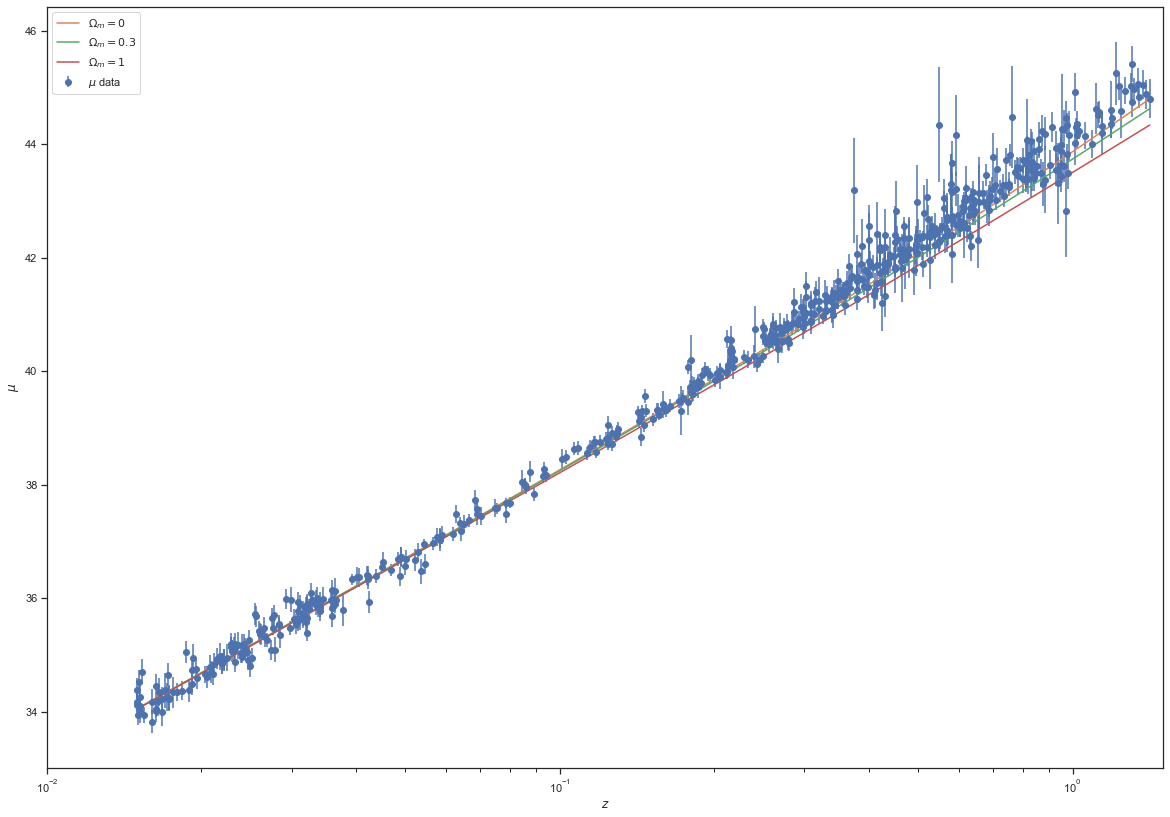

In [212]:
plt.figure(figsize = (20,14))

z_data_sorted = np.sort(z_data)[::-1]
plt.errorbar(z_data, mu_data, yerr=mu_err_data, marker='o', linestyle='', label=r'$\mu$ data')
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=0), label=r'$\Omega_m=0$')
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=0.3), label=r'$\Omega_m=0.3$')
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=1), label=r'$\Omega_m=1$')

plt.xscale('log')
plt.legend(loc='upper left')
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [99]:
print('Chi squared Omega_m=0:', chi_sq(mu_data, mu(z_data, omega_m=0), mu_err_data))
print('Chi squared Omega_m=0.3:', chi_sq(mu_data, mu(z_data, omega_m=0.3), mu_err_data))
print('Chi squared Omega_m=1:', chi_sq(mu_data, mu(z_data, omega_m=1), mu_err_data))

Chi squared Omega_m=0: 904.6723601086578
Chi squared Omega_m=0.3: 1220.2057995368355
Chi squared Omega_m=1: 2136.059981620787


The model for $\mu$ with $\Omega_m=0$ fits the best because it has the lowest value of $\chi^2$.

You should find that the measured data do not fit well to all three scenarios. "The high-redshift supernovae are fainter than would be expected even for an empty cosmos (corresponding to $\Omega_m = 0$)." So what's wrong? 
<br><br>
"If these data are correct, the obvious implication is that the simplest cosmological model must be too simple. The next simplest model might be one that Einstein entertained for a time. Believing the universe to be static, he tentatively introduced into the equations of general relativity an expansionary term he called the “cosmological constant” ($\Lambda$) that would compete against gravitational collapse. After Hubble’s discovery of the cosmic expansion, Einstein famously rejected $\Lambda$ as his “greatest blunder.” In later years, $\Lambda$ came to be identified with the zero-point vacuum energy of all quantum fields. It turns out that invoking a cosmological constant allows us to fit the supernova data quite well." (Saul Perlmutter, https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/)
<br><br>
So in short, the data indicates that faint supernovae are further away from the earth than had been theoretically expected. The expansion rate of the universe is increasing indeed. It seems that some mysterious material (which we call "dark energy") is causing such antigravity effects. The cosmological constant, $\Lambda$, the value of the energy density of the vacuum of space is widely accepted as a leading candidate of dark energy. 
<br><br>
Now let us add a general form of dark energy to our model.
<br><br>
$$H^2(z) = H_0^2[\Omega_m(1+z)^3 + \Omega_{DE}(1+z)^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z)^2].$$ <br> $w$ is the dark energy equation of state, which is the ratio of its pressure to its energy density. $w = -1$ for the cosmological constant $\Lambda$. <br><br>
$\Omega_0 = \Omega_{m}$ (matter density parameter today) + $\Omega_{DE}$ (dark energy density parameter today), and 
<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.

<span style="color:blue"> <i> 2. Now assume three different scenarios: ($\Omega_m = 0.3, \Omega_{DE} = 0$), ($\Omega_m = 0, \Omega_{DE} = 1, w = -1$), and ($\Omega_m = 0.3, \Omega_{DE} = 0.7, w = -1$). Again, plot three curves of $\mu$ as a function of $z$ on top of data (assume $h = 0.7$) </i></span><br>


In [38]:
def D_l2(z_list, omega_m, omega_DE, w=-1, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + omega_DE*(1+x)**(3*(1+w)) + (1-omega_m-omega_DE)*(1+x)**2)
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def mu2(z, omega_m, omega_DE, w=-1, h=0.7):
    return 25 + 5*np.log10(D_l2(z, omega_m, omega_DE, w=-1, h=0.7))

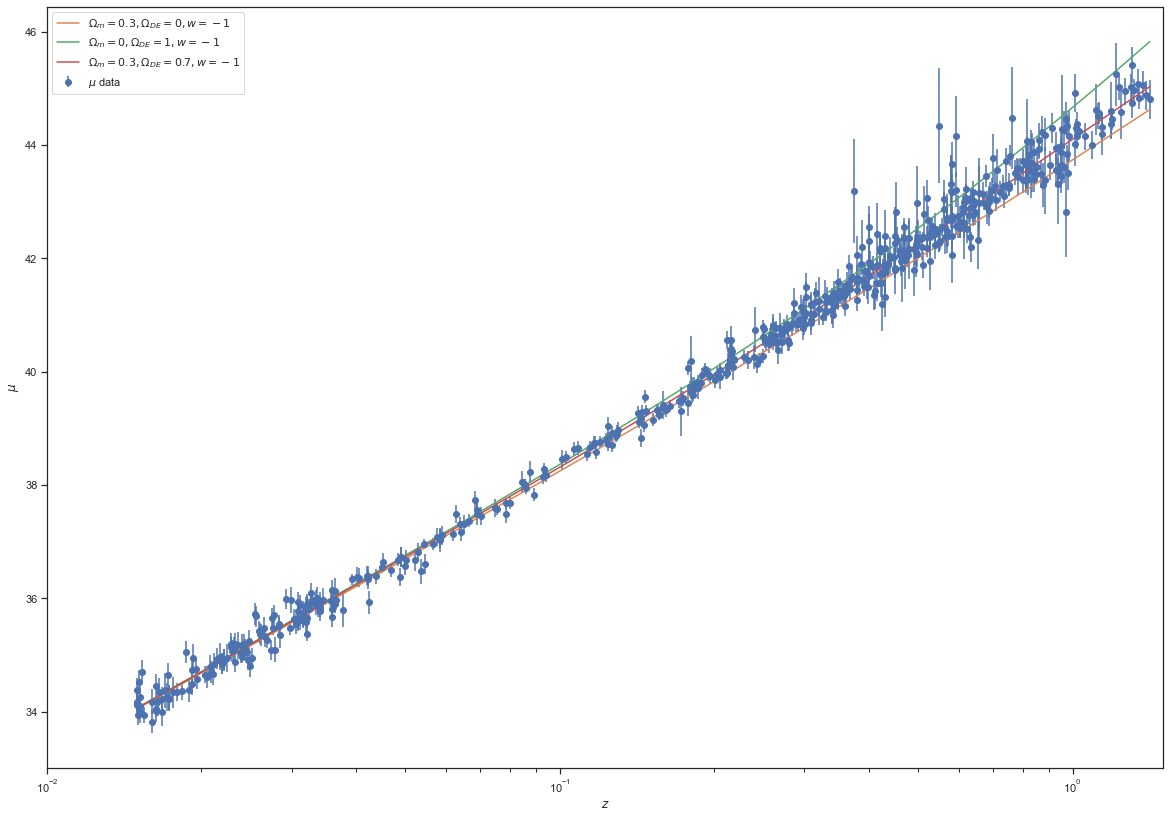

In [213]:
plt.figure(figsize = (20,14))

z_data_sorted = np.sort(z_data)[::-1]
plt.errorbar(z_data, mu_data, yerr=mu_err_data, marker='o', linestyle='', label=r'$\mu$ data')
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0.3, omega_DE=0), label=r'$\Omega_m=0.3, \Omega_{DE}=0, w=-1$')
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0, omega_DE=1), label=r'$\Omega_m=0, \Omega_{DE}=1, w=-1$')
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0.3, omega_DE=0.7), label=r'$\Omega_m=0.3, \Omega_{DE}=0.7, w=-1$')

plt.xscale('log')
plt.legend(loc='upper left')
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [98]:
print('Chi squared Omega_m=0.3, Omega_DE=0:', chi_sq(mu_data, mu2(z_data, omega_m=0.3, omega_DE=0), mu_err_data))
print('Chi squared Omega_m=0, Omega_DE=1:', chi_sq(mu_data, mu2(z_data, omega_m=0, omega_DE=1), mu_err_data))
print('Chi squared Omega_m=0.3, Omega_DE=0.7:', chi_sq(mu_data, mu2(z_data, omega_m=0.3, omega_DE=0.7), mu_err_data))

Chi squared Omega_m=0.3, Omega_DE=0: 1220.2057995368355
Chi squared Omega_m=0, Omega_DE=1: 1306.2430616410609
Chi squared Omega_m=0.3, Omega_DE=0.7: 565.0029735183822


You basically reproduced the below figure!
![alt text](https://drive.google.com/uc?id=1pTUg9Ztj1oOgHMuZsRCQuf4yOi161ZpX)
You should see that $\Omega_m = 0.3$ and $\Omega_\Lambda = 0.7$ fits the data best. In combination with the CMB data, this shows that about 70% of the total energy density is vacuum energy and 30% is mass.
***
Now, with measurements of the distance modulus $\mu$, use Bayesian analysis to estimate the cosmological parameters.
<br><br>
let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

***

Next, write an MCMC code using the <b>Metropolis algorithm</b>. 

Now, assume a more general form of dark energy. (Do not fix $w$ to -1; add $w$ as a parameter.)

In the flat universe, <br><br>

$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$. Here, we fix $h = 0.7$.<br><br>
We calculate the likelihood $L$ as: <br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{\Delta \mu_i^2}{\sigma(\mu_i)^2} $$
<br>
where $$ \mu_{i,\ model}(z_i, \Omega_m, w) = 25 + 5\cdot \mathrm{log}_{10}(D_{L,\ i})$$<br>
$$ D_{L,\ i} = \frac{2997.92458}{0.7} (1+z_i)\int_0^{z_i} \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}} $$
<br><br>
<span style="color:blue"> <i> 3. Run the MCMC code to estimate $w$ and $\Omega_m$. Plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior (i.e. plot the chain in two-dimensional parameter space. Make sure that the chain has converged (you can change nsamples, nburn).  </i></span><br><br>

Hint:

Set the length of MCMC chains to be 15,000 (or even more if you think that the chain has not yet converged.) In the end, you should throw away the first 20% of the chain as burn-in. (20% is an arbitrary number. You can plot the chain and estimate the burn-in period.)

Then, set the random initial point in the parameter space $(w, \Omega_m)$: let $w$ be negative and $\Omega_m$ be positive and draw a random number using np.random.uniform(). Set initial likelihood to low value (e.g. -1.e100) so that next point is accepted.

Now, draw a new sample starting from this random initial point. Here we assume that the proposal distribution is Gaussian with arbitrary width: in this problem, we assume that $\sigma = 0.01$ (This determines how far you propose jumps.) for distributions for both $w, \Omega_m$.

For example, say that you start with $(w, \Omega_m)$ = $(-0.3, 0.7)$. Then, draw a new sample of $w$ from a Gaussian with $\mu = -0.3, \sigma = 0.01$ and a new sample of $\Omega_m$ from a Gaussian with $\mu = -0.7, \sigma = 0.01$.

Now, evaluate the log likelihood value of this new point.

If the value has gone up, accept the point.

Otherwise, accept it with probability given by ratio of likelihoods:
Draw a random number from a uniform distribution between 0 and 1 ( $\alpha$ = np.random.uniform() ). If the ratio $ln(\frac{L_{new}}{L_{old}})$ is greater than $ln(\alpha)$ (i.e. $\frac{L_{new}}{L_{old}} > \alpha$), then accept it. Otherwise, reject it and stay at your old point.

Repeat this 15,000 times (the length of chain) and plot the distributions of $(w, \Omega_m)$.

See the undergrad version for more hints.

In [ ]:
# Import data
data = np.loadtxt(localpath+"sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

In [105]:
def D_l3(z_list, omega_m, w, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + (1-omega_m)*(1+x)**(3*(1+w)))
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def mu3(z, omega_m, w, h=0.7):
    return 25 + 5*np.log10(D_l3(z, omega_m, w, h=0.7))

def chi_sq(mu_data, mu_model, mu_err):
    return np.sum(((mu_data - mu_model)/mu_err)**2)

In [175]:
# Define the likelihood function:

def lnL(omega_m, w, z_data=z_data):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(omega_m<=0 or w>=0):
        lnL = -1e100
    else:
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*chi_sq(mu_data, mu3(z_data, omega_m, w), mu_err_data)
        
    return lnL

In [176]:
# Draw new proposed samples from a proposal distribution, centred on old values
# Accept or reject, and colour points according to ln(likelihood):

def MCMC(chain_length=15000):
    chain = np.zeros([chain_length, 3])
    lnL_old = -1.e100 # initial likelihood
    w = -np.random.uniform() # set w
    omega_m = np.random.uniform() # set omega_m
    chain[0] = [w, omega_m, lnL_old]
    for i in range(1,chain_length):
        omega_m_new = np.random.normal(omega_m, 0.01) # draw from gaussian centered around omega_m with error 0.01
        w_new = np.random.normal(w, 0.01) # draw from gaussian centered around w with error 0.01
        lnL_new = lnL(omega_m_new, w_new)
#         lnL_ratio = lnL_new - lnL_old
#         if lnL_ratio > 0:
        if lnL_new > lnL_old:
            omega_m = omega_m_new
            w = w_new
            lnL_old = lnL_new
        else:
            lnL_ratio = lnL_new - lnL_old
            alpha = np.random.uniform()
            if lnL_ratio > np.log(alpha):
                omega_m = omega_m_new
                w = w_new
                lnL_old = lnL_new
        chain[i] = [w, omega_m, lnL_old]
    return chain

In [177]:
chain3 = MCMC()

In [178]:
burnin = 2*math.floor(len(chain3)/10)
mean_w = np.mean(chain3[burnin:,0])
std_w = np.std(chain3[burnin:,0])
mean_omega_m = np.mean(chain3[burnin:,1])
std_omega_m = np.std(chain3[burnin:,1])
print('w = ', mean_w, '+/-', std_w)
print('Omega_m = ', mean_omega_m, '+/-', std_omega_m)
print(f'Chi squared:', chi_sq(mu_data, mu3(z_data, omega_m=mean_omega_m, w=mean_w), mu_err_data))

w =  -1.0902897162630631 +/- 0.1595733856557873
Omega_m =  0.30556193412151494 +/- 0.06173205109352681
Chi squared: 562.9519244596875


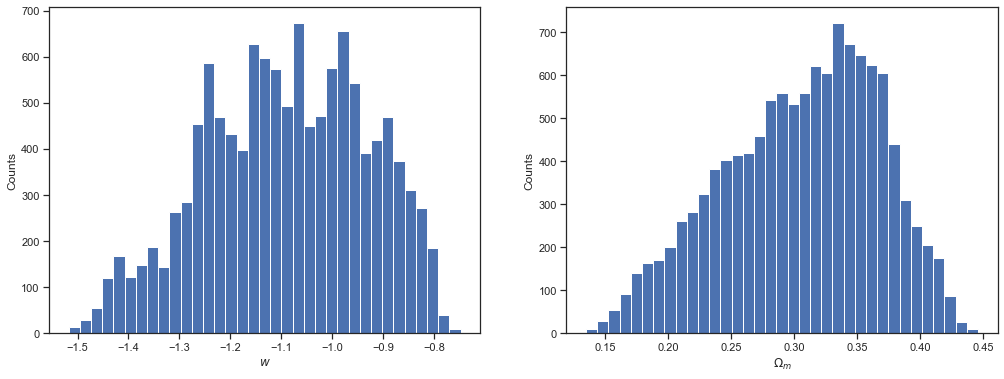

In [179]:
fix, ax = plt.subplots(1,2, figsize=(17,6))

ax[0].hist(chain3[burnin:,0], bins=35)
ax[1].hist(chain3[burnin:,1], bins=35)

ax[0].set(xlabel='$w$', ylabel='Counts')
ax[1].set(xlabel='$\Omega_m$', ylabel='Counts')

plt.show()

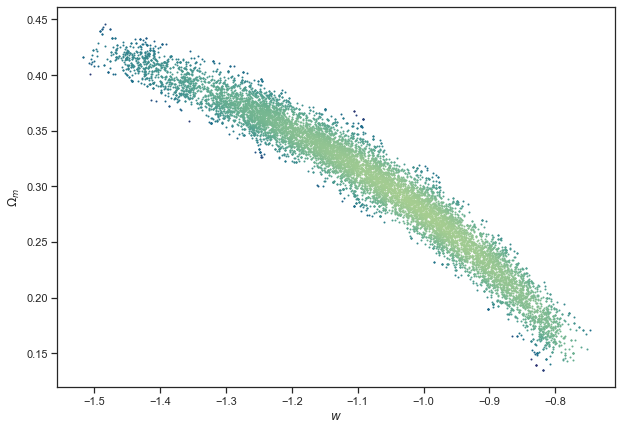

In [216]:
plt.figure(figsize = (10,7))

colormap=sns.color_palette("crest", as_cmap=True)
norm = colors.LogNorm(-np.max(chain3[burnin:,2]), -np.min(chain3[burnin:,2]))
# norm = colors.Normalize(np.min(chain3[burnin:,2]), np.max(chain3[burnin:,2]))

for i in range(burnin,len(chain3)):
    plt.plot(chain3[i,0], chain3[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain3[i,2])))
#     plt.plot(chain3[i,0], chain3[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(chain3[i,2])))
    
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

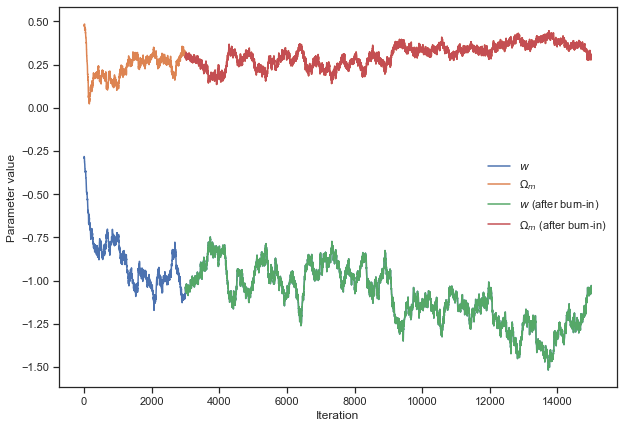

In [180]:
plt.figure(figsize = (10,7))

plt.plot(chain3[:,0], label='$w$')
plt.plot(chain3[:,1], label='$\Omega_m$')
plt.plot(np.arange(burnin,len(chain3),1), chain3[burnin:,0], label='$w$ (after burn-in)')
plt.plot(np.arange(burnin,len(chain3),1), chain3[burnin:,1], label='$\Omega_m$ (after burn-in)')
# plt.plot(chain3[0,0], marker='o', ms=5)
# plt.plot(chain3[0,1], marker='o', ms=5)

plt.legend(loc='best', frameon=False)
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.show()

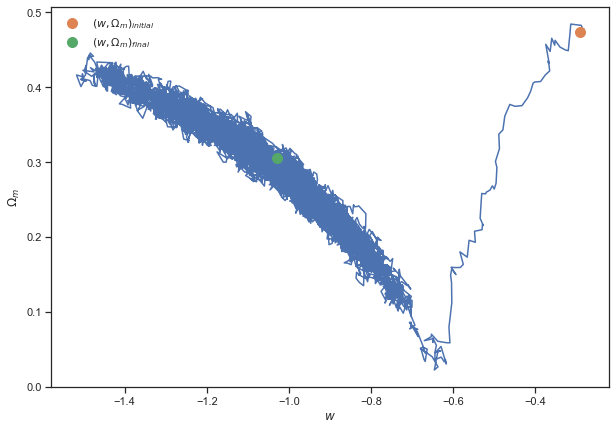

In [181]:
plt.figure(figsize = (10,7))

plt.plot(chain3[:,0], chain3[:,1])
plt.plot(chain3[0,0], chain3[0,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{initial}$')
plt.plot(chain3[-1,0], chain3[-1,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{final}$')

plt.legend(loc='upper left', frameon=False)
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

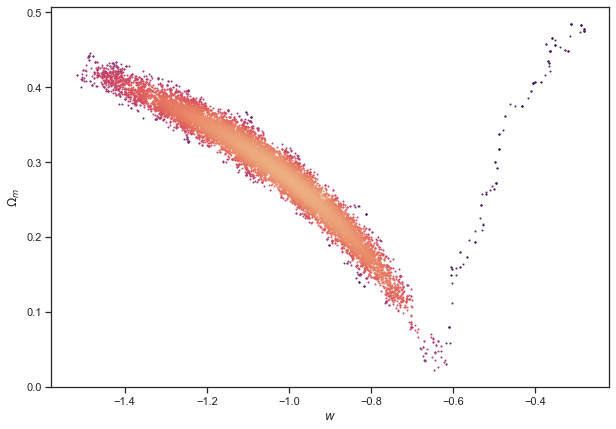

In [200]:
plt.figure(figsize = (10,7))

# colormap=sns.color_palette("RdBu", as_cmap=True)
# colormap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
colormap=sns.color_palette("flare", as_cmap=True)
# colormap=sns.color_palette("crest", as_cmap=True)
norm = colors.LogNorm(-np.max(chain3[burnin:,2]), -np.min(chain3[burnin:,2]))

for i in range(len(chain3)):
    plt.plot(chain3[i,0], chain3[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain3[i,2])))
    
# plt.plot(chain3[0,0], chain3[0,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{initial}$')
# plt.plot(chain3[-1,0], chain3[-1,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{final}$')

# plt.legend(loc='upper left', frameon=False)
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

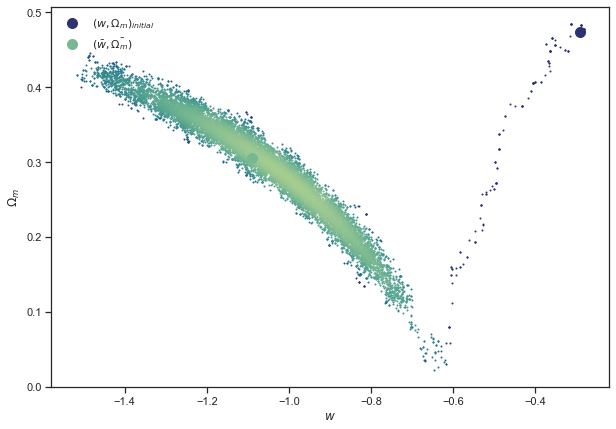

In [206]:
plt.figure(figsize = (10,7))

# colormap=sns.color_palette("RdBu", as_cmap=True)
# colormap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# colormap=sns.color_palette("flare", as_cmap=True)
colormap=sns.color_palette("crest", as_cmap=True)
norm = colors.LogNorm(-np.max(chain3[burnin:,2]), -np.min(chain3[burnin:,2]))

for i in range(len(chain3)):
    plt.plot(chain3[i,0], chain3[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain3[i,2])))
    
plt.plot(chain3[0,0], chain3[0,1], marker='o', linestyle='', ms=10, color=colormap(norm(-chain3[0,2])), label=r'$(w,\Omega_m)_{initial}$')
plt.plot(mean_w, mean_omega_m, marker='o', linestyle='', ms=10, color=colormap(norm(-np.mean(chain3[burnin:,2]))), label=r'$(\bar{w},\bar{\Omega_m})$')


plt.legend(loc='upper left', frameon=False)
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

In [113]:
chain2 = MCMC()

In [129]:
burnin = 2*math.floor(len(chain2)/10)
mean_w = np.mean(chain2[burnin:,0])
std_w = np.std(chain2[burnin:,0])
mean_omega_m = np.mean(chain2[burnin:,1])
std_omega_m = np.std(chain2[burnin:,1])
print('w = ', mean_w, '+/-', std_w)
print('Omega_m = ', mean_omega_m, '+/-', std_omega_m)
print(f'Chi squared:', chi_sq(mu_data, mu3(z_data, omega_m=mean_omega_m, w=mean_w), mu_err_data))

w =  -1.0231592794915458 +/- 0.1442661616297696
Omega_m =  0.2803864448499807 +/- 0.060069672255415665
Chi squared: 562.5396734592024


In [126]:
print(f'Chi squared (w={mean_w}, Omega_m={mean_omega_m}):', 
      chi_sq(mu_data, mu3(z_data, omega_m=mean_omega_m, w=mean_w), mu_err_data))

Chi squared (w=-1.0231592794915458, Omega_m=0.2803864448499807): 562.5396734592024


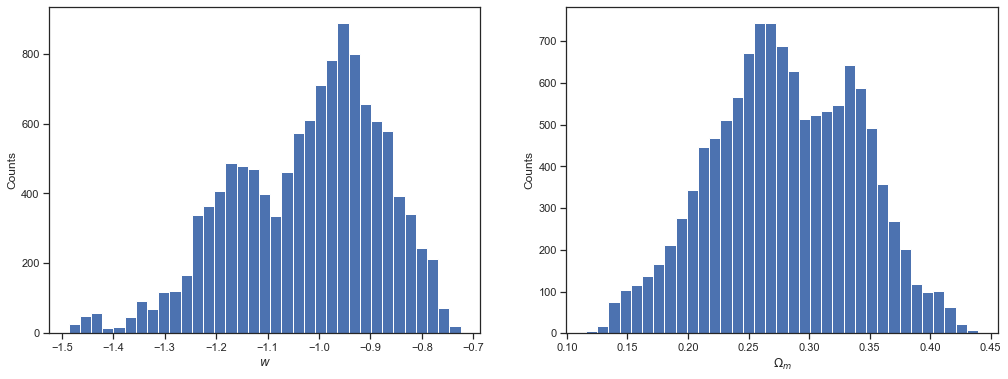

In [142]:
fix, ax = plt.subplots(1,2, figsize=(17,6))

ax[0].hist(chain2[burnin:,0], bins=35)
ax[1].hist(chain2[burnin:,1], bins=35)

ax[0].set(xlabel='$w$', ylabel='Counts')
ax[1].set(xlabel='$\Omega_m$', ylabel='Counts')

plt.show()

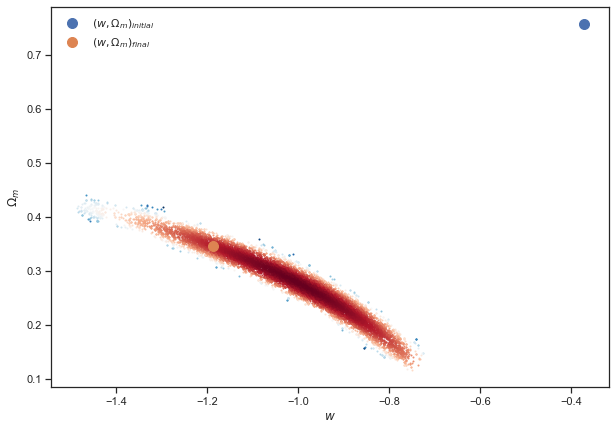

In [195]:
plt.figure(figsize = (10,7))

# norm = colors.Normalize(np.min(chain2[:,2]), np.max(chain2[:,2]))
# norm = colors.LogNorm(-np.max(chain2[:,2]), -np.min(chain2[:,2]))
norm = colors.LogNorm(-np.max(chain2[burnin:,2]), -np.min(chain2[burnin:,2]))
# colormap=sns.color_palette("Spectral_r", as_cmap=True)
colormap=sns.color_palette("RdBu", as_cmap=True)

for i in range(burnin,len(chain2)):
#     plt.plot(chain2[i,0], chain2[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain2[i,2])))
    plt.plot(chain2[i,0], chain2[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain2[i,2])))
    
# plt.plot(chain2[0,0], chain2[0,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{initial}$')
# plt.plot(chain2[-1,0], chain2[-1,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{final}$')

plt.legend(loc='upper left', frameon=False)
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

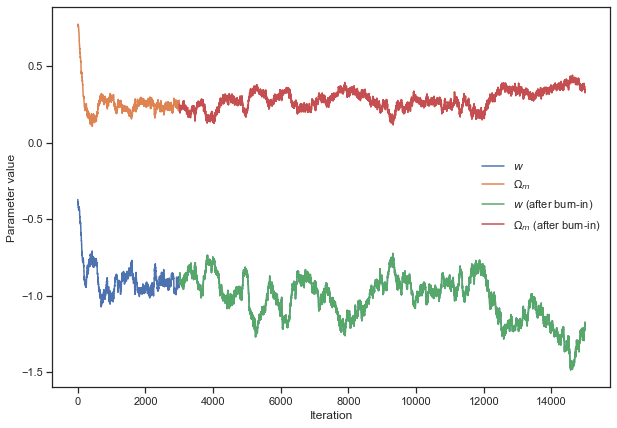

In [152]:
plt.figure(figsize = (10,7))

plt.plot(chain2[:,0], label='$w$')
plt.plot(chain2[:,1], label='$\Omega_m$')
plt.plot(np.arange(burnin,len(chain2),1), chain2[burnin:,0], label='$w$ (after burn-in)')
plt.plot(np.arange(burnin,len(chain2),1), chain2[burnin:,1], label='$\Omega_m$ (after burn-in)')
# plt.plot(chain2[0,0], marker='o', ms=5)
# plt.plot(chain2[0,1], marker='o', ms=5)

plt.legend(loc='best', frameon=False)
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.show()

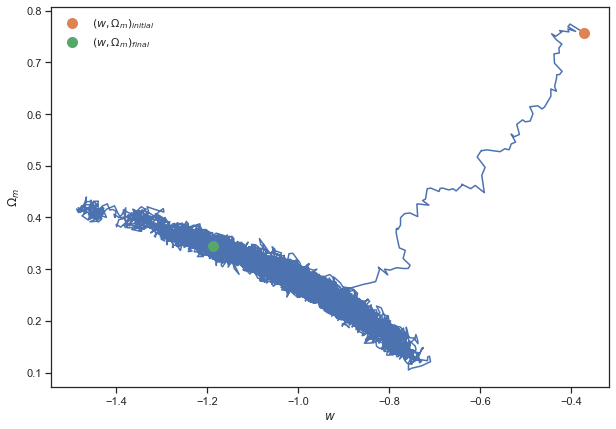

In [145]:
plt.figure(figsize = (10,7))

plt.plot(chain2[:,0], chain2[:,1])
plt.plot(chain2[0,0], chain2[0,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{initial}$')
plt.plot(chain2[-1,0], chain2[-1,1], marker='o', linestyle='', ms=10, label=r'$(w,\Omega_m)_{final}$')

plt.legend(loc='upper left', frameon=False)
plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.show()

In [116]:
print(f'Chi squared w={chain2[-1,0]}, Omega_m={chain2[-1,1]}:', 
      chi_sq(mu_data, mu3(z_data, omega_m=chain2[-1,1], w=chain2[-1,0]), mu_err_data))

Chi squared w=-1.1876935017290715, Omega_m=0.3457302845622899: 563.6197813375221


***